In [12]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn

In [13]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    return cat


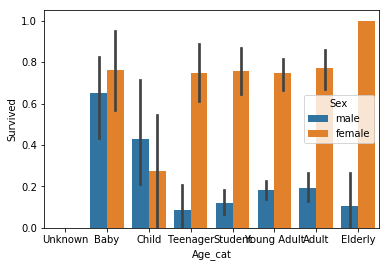

In [22]:
titanic_df = pd.read_csv('./kaggle/titanic/train.csv')
# titanic_df = titanic_df.drop(['PassengerId', 'Ticket', 'Name'], axis=1)
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

# titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

# sns.barplot(x='Sex', y='Survived', data=titanic_df)
# sns.barplot(x='Pclass', y='Survived', data=titanic_df, hue='Sex')

# titanic_df['Age_cat'] = titanic_df['Age'].apply(get_category)
# titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
titanic_df['Age_cat'] = list(map(lambda x: get_category(x), titanic_df['Age']))
group_name = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_name) # order: xticks, 순서



## 깃 테스트용


# X_train = titanic_df[titanic_df.columns.difference(['Survived'])]
# Y_train = titanic_df[['Survived']]

In [16]:
titanic_df['Sex'].value_counts(), titanic_df['Cabin'].value_counts(), titanic_df['Embarked'].value_counts()

(male      577
 female    314
 Name: Sex, dtype: int64,
 N    687
 C     59
 B     47
 D     33
 E     32
 A     15
 F     13
 G      4
 T      1
 Name: Cabin, dtype: int64,
 S    644
 C    168
 Q     77
 N      2
 Name: Embarked, dtype: int64)

In [4]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')